# 情感识别二分类 - 电影评论识别 正向 & 负向

In [2]:
from tensorflow.keras.datasets import imdb

# 加载IMDB数据集 从本地获取（没有则下载到本地 datasets目录）
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #

# num_words=10000 表示仅保留训练数据中出现频率最高的前10000个单词
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

最多有 10000（0~9999）个单词 (限定）

In [2]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [11]:
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because in the sentence 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # as the first example
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

数据处理为可进行输入的
1. 标准化
2. 向量化

由于总共有10000的单词，所以实现对应的独热编码矩阵即可

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] += 1.  # set specific indices of results[i] to 1s
    return results

train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
# Our vectorized labels
train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')
train_labels

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

训练模型 3折验证

In [6]:
from keras import models
from keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
# 定义K折交叉验证的折数
k = 3
# 创建K折交叉验证对象
kf = KFold(n_splits=k)
scores = []

def getModel():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# 进行K折交叉验证
for train_index, test_index in kf.split(train_data):
    # 划分训练集和测试集
    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]
    
    model = getModel()
    history = model.fit(X_train,
                    y_train,
                    epochs=7,
                    batch_size=512,)
#                     validation_split=0.2)
    # 训练模型
    
    # 在测试集上进行预测
    y_pred = model.predict(X_test)
    
    # 计算模型评估指标（这里以准确率为例）
    y_pred = (y_pred >= 0.5).astype(int) # 
    print(y_test,y_pred)
    accuracy = accuracy_score(y_test, y_pred)
              
    # 将评估结果添加到列表中
    scores.append(accuracy)
    
# 打印每个折的评估结果和平均性能指标
for i, score in enumerate(scores):
    print(f"Fold {i+1} Accuracy: {score}")

# 计算K折交叉验证的平均性能指标
average_score = sum(scores) / k
print(f"Average Accuracy: {average_score}")

Epoch 1/7
33/33 [==============================] - 1s 14ms/step - loss: 0.4962 - accuracy: 0.7869
Epoch 2/7
33/33 [==============================] - 0s 13ms/step - loss: 0.2970 - accuracy: 0.8967
Epoch 3/7
33/33 [==============================] - 0s 12ms/step - loss: 0.2211 - accuracy: 0.9238
Epoch 4/7
33/33 [==============================] - 0s 14ms/step - loss: 0.1826 - accuracy: 0.9363
Epoch 5/7
33/33 [==============================] - 0s 13ms/step - loss: 0.1544 - accuracy: 0.9455
Epoch 6/7
33/33 [==============================] - 0s 13ms/step - loss: 0.1285 - accuracy: 0.9572
Epoch 7/7
261/261 [==============================] - 0s 1ms/step
[1. 0. 0. ... 1. 0. 1.] [[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]
Epoch 1/7
33/33 [==============================] - 1s 13ms/step - loss: 0.5134 - accuracy: 0.7760
Epoch 2/7
33/33 [==============================] - 0s 13ms/step - loss: 0.3098 - accuracy: 0.8963
Epoch 3/7
33/33 [==============================] - 0s 12ms/step - loss: 0.2366 - accuracy: 

根据首次训练中，我们根据图像趋势已得到最终的最佳轮次

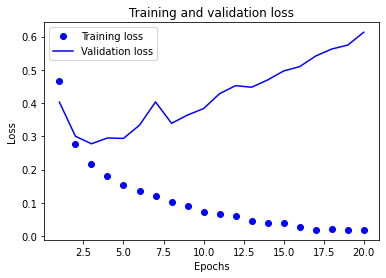

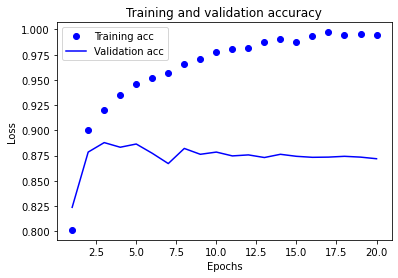

In [33]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 新闻分类 ： 多分类问题 新闻主题分类

In [16]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) 

In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

550378/550378 [==============================] - 0s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

共有46种类的主题

In [17]:
max(train_labels)

45

In [18]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] += 1.  # set specific indices of results[i] to 1s
    return results

train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Epoch 1/100
15/15 [==============================] - 1s 42ms/step - loss: 2.6739 - accuracy: 0.5100 - val_loss: 1.7936 - val_accuracy: 0.6327
Epoch 2/100
15/15 [==============================] - 0s 23ms/step - loss: 1.5445 - accuracy: 0.6735 - val_loss: 1.4494 - val_accuracy: 0.6789
Epoch 3/100
15/15 [==============================] - 0s 23ms/step - loss: 1.2188 - accuracy: 0.7363 - val_loss: 1.2794 - val_accuracy: 0.7173
Epoch 4/100
15/15 [==============================] - 0s 25ms/step - loss: 1.0034 - accuracy: 0.7822 - val_loss: 1.1445 - val_accuracy: 0.7524
Epoch 5/100
15/15 [==============================] - 0s 27ms/step - loss: 0.8419 - accuracy: 0.8203 - val_loss: 1.0809 - val_accuracy: 0.7607
Epoch 6/100
15/15 [==============================] - 0s 24ms/step - loss: 0.7068 - accuracy: 0.8484 - val_loss: 1.0531 - val_accuracy: 0.7546
Epoch 7/100
15/15 [==============================] - 0s 24ms/step - loss: 0.6007 - accuracy: 0.8714 - val_loss: 1.0122 - val_accuracy: 0.7679
Epoch 

15/15 [==============================] - 0s 28ms/step - loss: 0.0819 - accuracy: 0.9645 - val_loss: 1.1203 - val_accuracy: 0.7991
Epoch 59/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0835 - accuracy: 0.9631 - val_loss: 1.1350 - val_accuracy: 0.7969
Epoch 60/100
15/15 [==============================] - 0s 25ms/step - loss: 0.0799 - accuracy: 0.9649 - val_loss: 1.1340 - val_accuracy: 0.7980
Epoch 61/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0839 - accuracy: 0.9624 - val_loss: 1.1525 - val_accuracy: 0.7885
Epoch 62/100
15/15 [==============================] - 0s 27ms/step - loss: 0.0796 - accuracy: 0.9637 - val_loss: 1.1768 - val_accuracy: 0.7880
Epoch 63/100
15/15 [==============================] - 0s 25ms/step - loss: 0.0832 - accuracy: 0.9656 - val_loss: 1.2246 - val_accuracy: 0.7885
Epoch 64/100
15/15 [==============================] - 0s 25ms/step - loss: 0.0796 - accuracy: 0.9619 - val_loss: 1.1656 - val_accuracy: 0.7941
Epoch 65/100

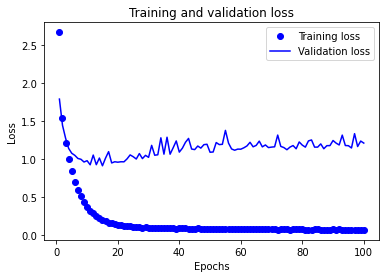

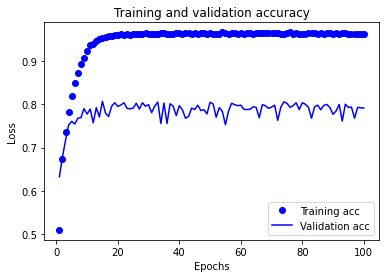

In [30]:
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_data,
                train_labels,
                epochs=100,
                batch_size=512,
                validation_split=0.2)
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
from keras import models
from keras import layers
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
# 定义K折交叉验证的折数
k = 3
# 创建K折交叉验证对象
kf = KFold(n_splits=k)
scores = []

def getModel():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# 进行K折交叉验证
for train_index, test_index in kf.split(train_data):
    # 划分训练集和测试集
    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = train_labels[train_index], train_labels[test_index]
    
    model = getModel()
    history = model.fit(X_train,
                    y_train,
                    epochs=60,
                    batch_size=512,)
#                     validation_split=0.2)
    # 训练模型
    
    # 在测试集上进行预测
    y_pred = model.predict(X_test)
    
    # 计算模型评估指标（这里以准确率为例）
    y_pred = (y_pred >= 0.5).astype(int) # 
    accuracy = accuracy_score(y_test, y_pred)
              
    # 将评估结果添加到列表中
    scores.append(accuracy)
    
# 打印每个折的评估结果和平均性能指标
for i, score in enumerate(scores):
    print(f"Fold {i+1} Accuracy: {score}")

# 计算K折交叉验证的平均性能指标
average_score = sum(scores) / k
print(f"Average Accuracy: {average_score}")

Epoch 1/60
12/12 [==============================] - 1s 34ms/step - loss: 0.5781 - accuracy: 0.0015
Epoch 2/60
12/12 [==============================] - 1s 56ms/step - loss: 0.2372 - accuracy: 0.0336
Epoch 3/60
12/12 [==============================] - 0s 36ms/step - loss: 0.1053 - accuracy: 0.4664
Epoch 4/60
12/12 [==============================] - 0s 35ms/step - loss: 0.0808 - accuracy: 0.5264
Epoch 5/60
12/12 [==============================] - 0s 39ms/step - loss: 0.0655 - accuracy: 0.6129
Epoch 6/60
12/12 [==============================] - 0s 35ms/step - loss: 0.0549 - accuracy: 0.6657
Epoch 7/60
12/12 [==============================] - 0s 38ms/step - loss: 0.0474 - accuracy: 0.6997
Epoch 8/60
12/12 [==============================] - 1s 43ms/step - loss: 0.0420 - accuracy: 0.7221
Epoch 9/60
12/12 [==============================] - 0s 38ms/step - loss: 0.0376 - accuracy: 0.7457
Epoch 10/60
12/12 [==============================] - 0s 34ms/step - loss: 0.0340 - accuracy: 0.7694
Epoch 11/

12/12 [==============================] - 0s 36ms/step - loss: 0.0094 - accuracy: 0.9489
Epoch 23/60
12/12 [==============================] - 0s 36ms/step - loss: 0.0086 - accuracy: 0.9527
Epoch 24/60
12/12 [==============================] - 0s 33ms/step - loss: 0.0078 - accuracy: 0.9564
Epoch 25/60
12/12 [==============================] - 0s 35ms/step - loss: 0.0072 - accuracy: 0.9571
Epoch 26/60
12/12 [==============================] - 0s 35ms/step - loss: 0.0066 - accuracy: 0.9608
Epoch 27/60
12/12 [==============================] - 0s 34ms/step - loss: 0.0061 - accuracy: 0.9634
Epoch 28/60
12/12 [==============================] - 0s 35ms/step - loss: 0.0057 - accuracy: 0.9631
Epoch 29/60
12/12 [==============================] - 0s 34ms/step - loss: 0.0053 - accuracy: 0.9646
Epoch 30/60
12/12 [==============================] - 0s 33ms/step - loss: 0.0049 - accuracy: 0.9648
Epoch 31/60
12/12 [==============================] - 0s 34ms/step - loss: 0.0047 - accuracy: 0.9658
Epoch 32/60


12/12 [==============================] - 0s 35ms/step - loss: 0.0028 - accuracy: 0.9738
Epoch 44/60
12/12 [==============================] - 0s 34ms/step - loss: 0.0028 - accuracy: 0.9733
Epoch 45/60
12/12 [==============================] - 0s 34ms/step - loss: 0.0027 - accuracy: 0.9733
Epoch 46/60
12/12 [==============================] - 0s 34ms/step - loss: 0.0026 - accuracy: 0.9739
Epoch 47/60
12/12 [==============================] - 0s 34ms/step - loss: 0.0026 - accuracy: 0.9731
Epoch 48/60
12/12 [==============================] - 0s 36ms/step - loss: 0.0025 - accuracy: 0.9724
Epoch 49/60
12/12 [==============================] - 0s 34ms/step - loss: 0.0025 - accuracy: 0.9734
Epoch 50/60
12/12 [==============================] - 0s 32ms/step - loss: 0.0024 - accuracy: 0.9726
Epoch 51/60
12/12 [==============================] - 0s 35ms/step - loss: 0.0024 - accuracy: 0.9731
Epoch 52/60
12/12 [==============================] - 0s 33ms/step - loss: 0.0024 - accuracy: 0.9734
Epoch 53/60


可以看到随机的概率是 44 % 

In [32]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

44.36242208370437